# **Final Project**


# **Project Title: Prediction of the Sale price of used cars**



# **REFERENCES**
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv

 https://medium.com/odscjournal/predicting-car-prices-using-machine-learning-and-data-science-52ed44abab1b

 https://www.kaggle.com/code/gauravduttakiit/car-price-prediction-using-lasso-regression

 https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv

 https://github.com/agusabdulrahman/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb

 https://towardsdatascience.com/catboost-vs-lightgbm-vs-xgboost-c80f40662924



In [ ]:
# importing all the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO (1).csv')

In [ ]:
dataframe.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Preprocessing and Performing EDA on the data

In [ ]:
dataframe.shape

(4340, 8)

### The dataset has 4340 rows and 8 columns. In the dataset the selling price is the target variable and the remaining 7 columns are the features of the model.

In [ ]:
target = dataframe.selling_price
target

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

### The selling price is in the indian currency rupees for each car and their making year

In [ ]:
# grouping all the null values in the dataframe
dataframe.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### There is no null values in the dataset and there is no cleaning is required and no imputation is done to the missing values

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# printing the value counts of different columns in the dataframe.
print(dataframe.fuel.value_counts())
print(dataframe.seller_type.value_counts())
print(dataframe.transmission.value_counts())
print(dataframe.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


## Encoding all the categorical data into integers in the feature columns

In [ ]:
dataframe.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
dataframe.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
dataframe.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
dataframe.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [ ]:
#Adding the new column to the dataframe
dataframe['Current_Year'] = 2023

In [ ]:
dataframe=dataframe.drop(['name'],axis=1)

In [ ]:
dataframe.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year
0,2007,60000,70000,0,0,0,0,2023
1,2007,135000,50000,0,0,0,0,2023
2,2012,600000,100000,1,0,0,0,2023
3,2017,250000,46000,0,0,0,0,2023
4,2014,450000,141000,1,0,0,1,2023
5,2007,140000,125000,0,0,0,0,2023
6,2016,550000,25000,0,0,0,0,2023
7,2014,240000,60000,0,0,0,1,2023
8,2015,850000,25000,0,0,0,0,2023
9,2017,365000,78000,2,0,0,0,2023


In [ ]:
# calculating the correlation coefficients between numerical columns in the dataframe, providing insights into their linear relationships.
dataframe.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year
year,1.000000,0.413922,-0.419688,0.090388,0.182458,0.143800,-0.410448,NaN
selling_price,0.413922,1.000000,-0.192289,0.226883,0.240666,0.530205,-0.198833,NaN
km_driven,-0.419688,-0.192289,1.000000,0.274760,-0.187131,-0.120226,0.274409,NaN
fuel,0.090388,0.226883,0.274760,1.000000,0.011358,0.027507,0.015318,NaN
seller_type,0.182458,0.240666,-0.187131,0.011358,1.000000,0.200191,-0.211115,NaN
transmission,0.143800,0.530205,-0.120226,0.027507,0.200191,1.000000,-0.083924,NaN
owner,-0.410448,-0.198833,0.274409,0.015318,-0.211115,-0.083924,1.000000,NaN
Current_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Separating the target feature from the remaining features
X = dataframe.drop(['selling_price'], axis =1)
Y = dataframe['selling_price']

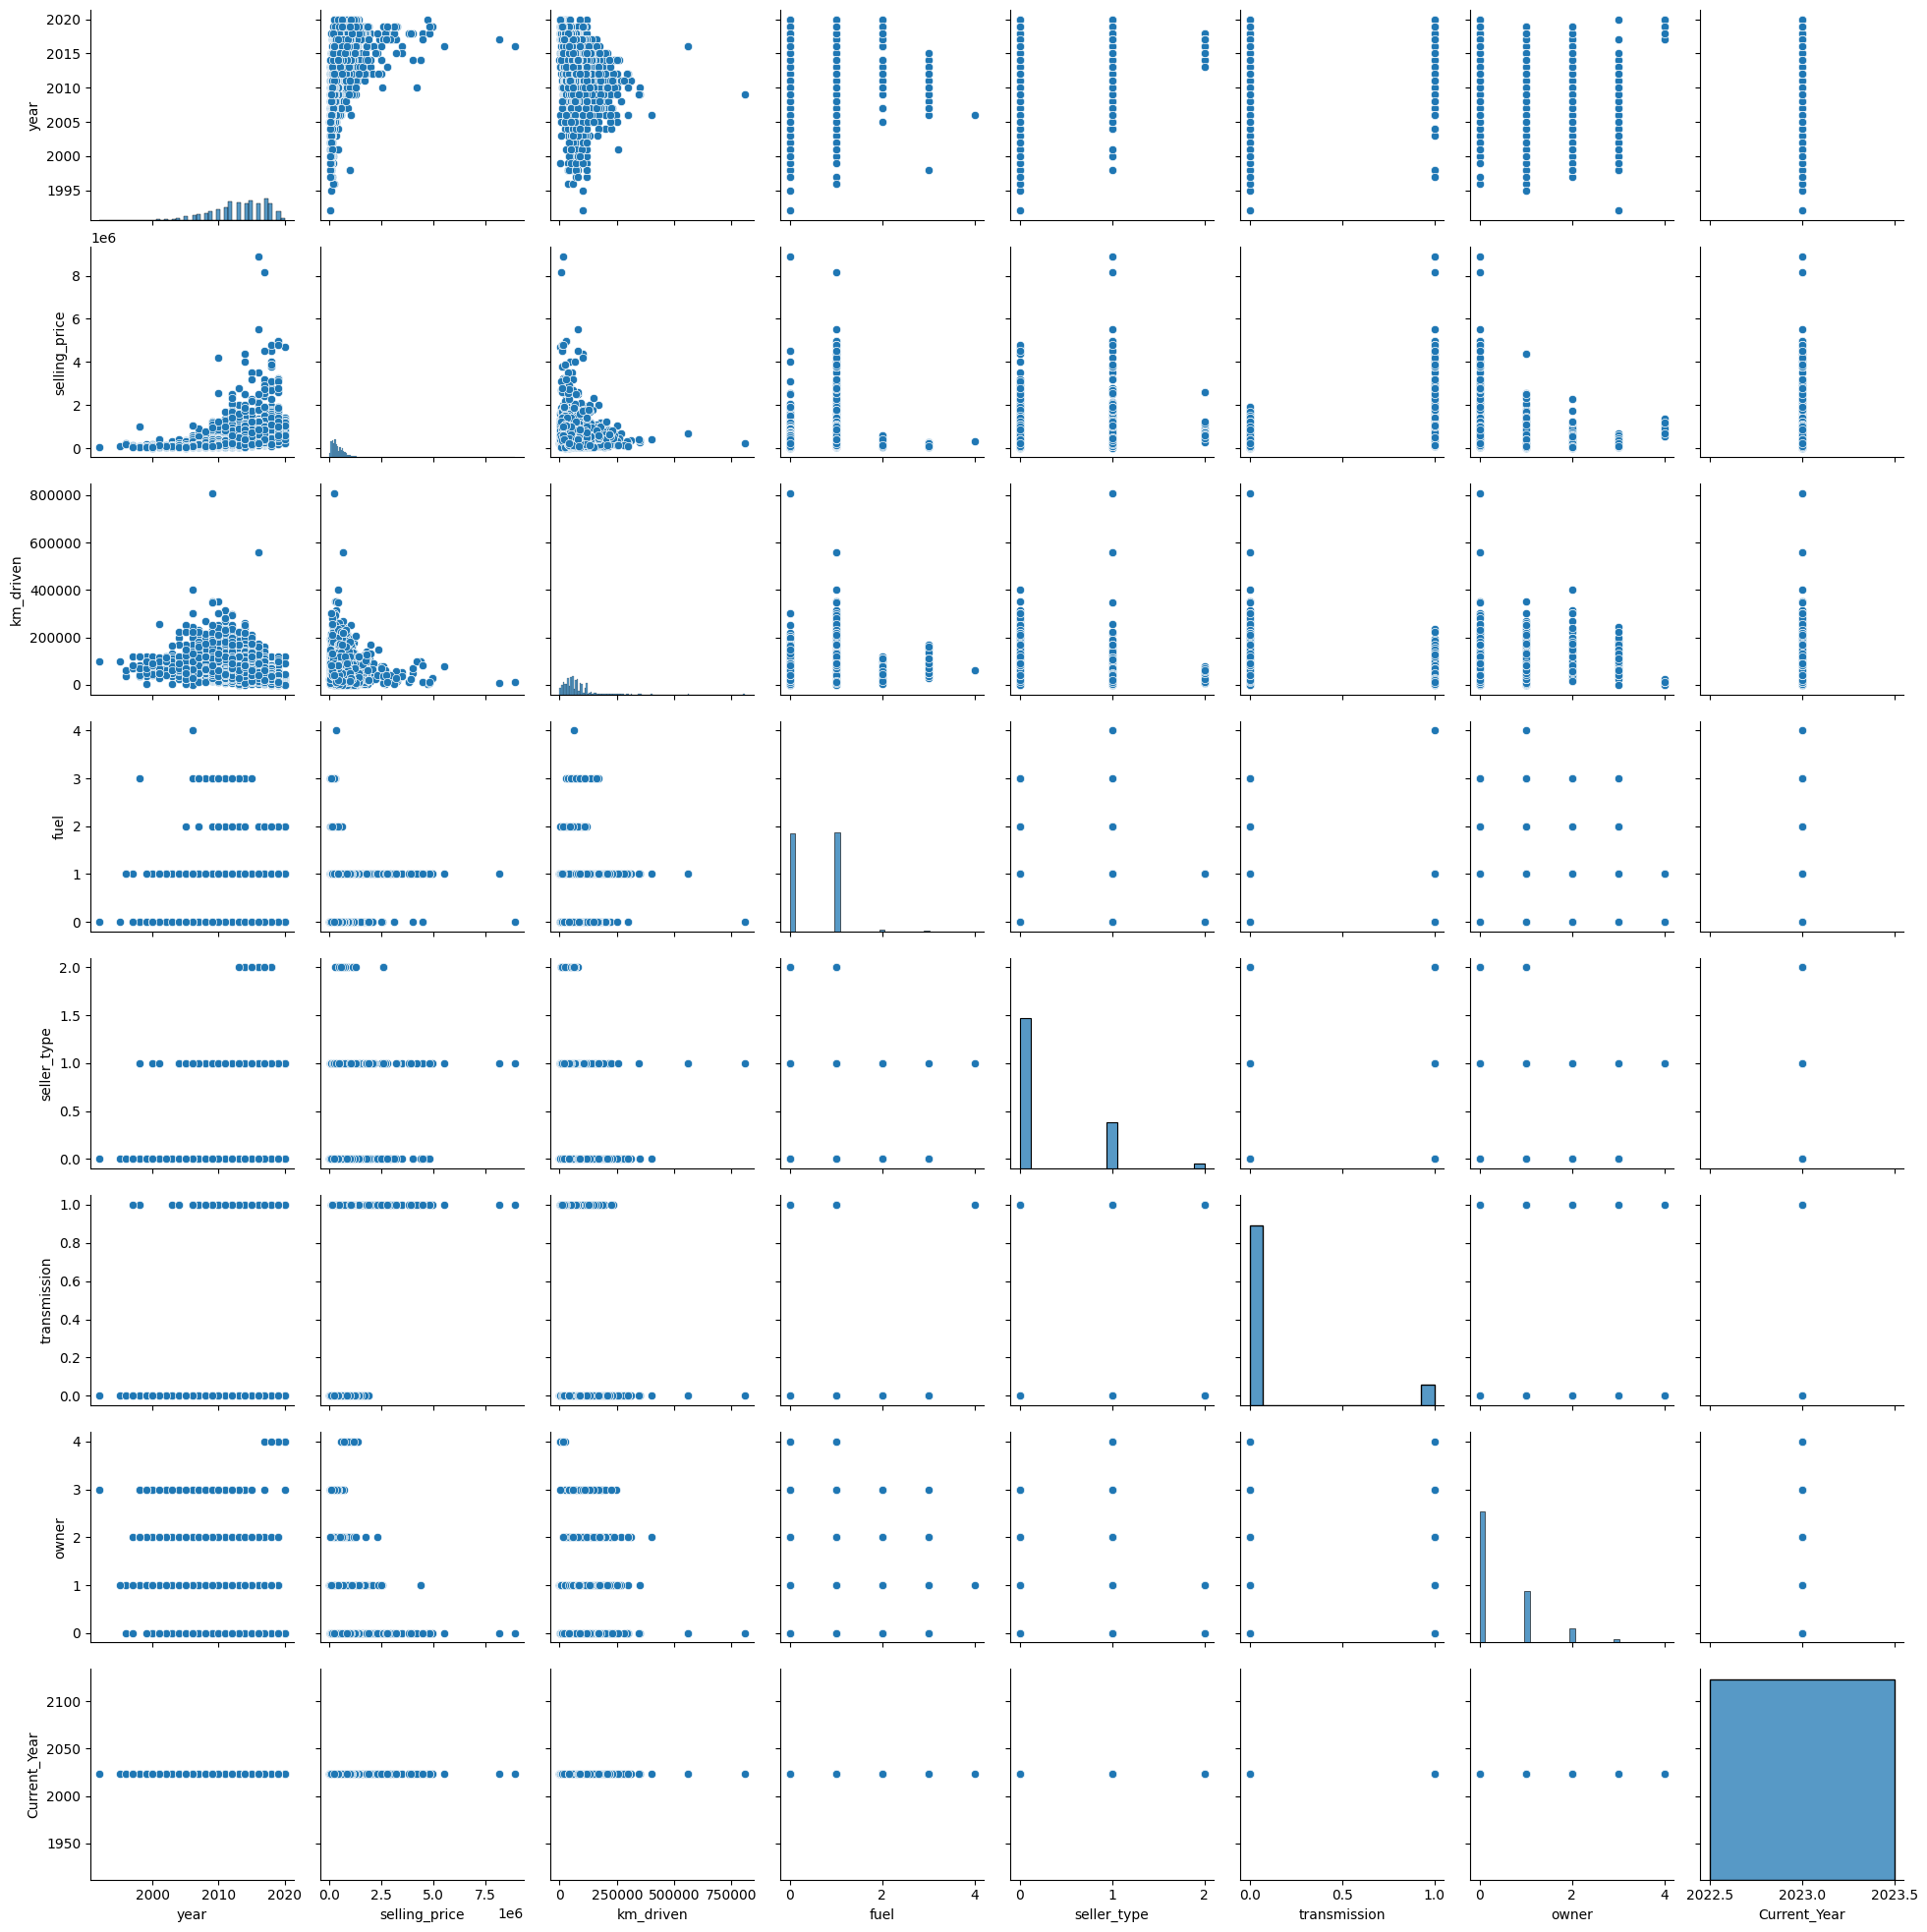

In [ ]:
# creating a pair plot using seaborn library to visualize the pairwise relationships between variables in the dataframe.
sns.pairplot(dataframe)

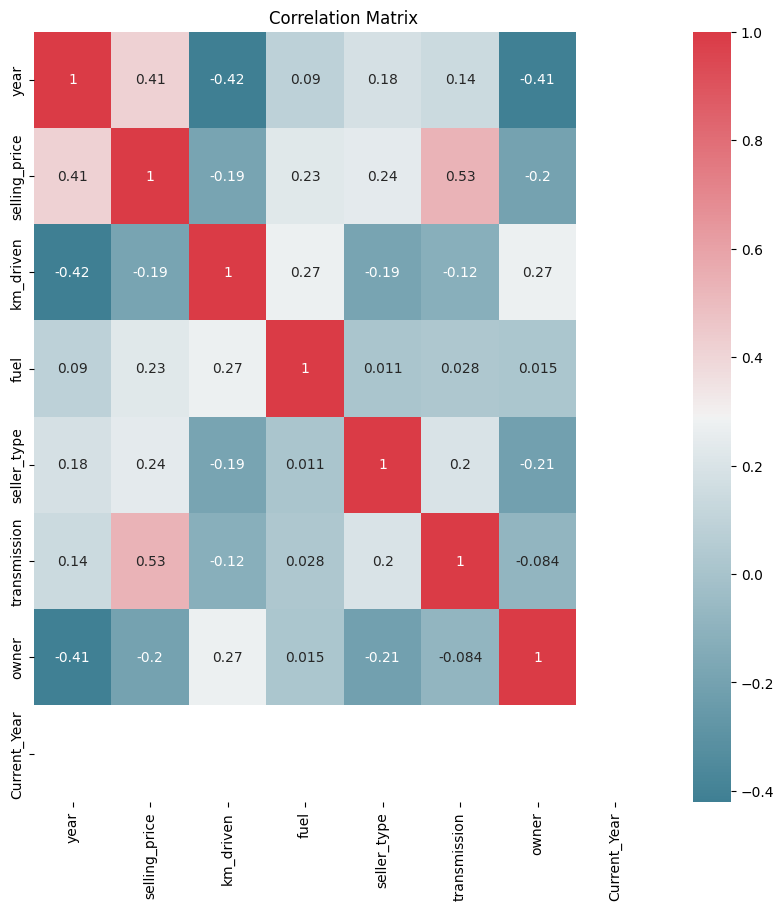

In [ ]:
# generating a correlation matrix heatmap using seaborn library to visualize the correlation coefficients between variables in the dataframe.
corrmat = dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(dataframe[top_corr_features].corr(), annot=True, cmap=cmap)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X

,year,km_driven,fuel,seller_type,transmission,owner,Current_Year
0,2007,70000,0,0,0,0,2023
1,2007,50000,0,0,0,0,2023
2,2012,100000,1,0,0,0,2023
3,2017,46000,0,0,0,0,2023
4,2014,141000,1,0,0,1,2023
...,...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1,2023
4336,2014,80000,1,0,0,1,2023
4337,2009,83000,0,0,0,1,2023
4338,2016,90000,1,0,0,0,2023


In [ ]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

## Removing the Outliers from the data

In [ ]:
import numpy as np
from scipy import stats

# Calculate z-scores for each feature in X
z_scores = np.abs(stats.zscore(X))

# Set a threshold for identifying outliers (e.g., z-score greater than 3)
outlier_threshold = 3

# Find indices of outliers based on the z-scores
outlier_indices = np.where(z_scores > outlier_threshold)

# Get the non-outlier indices
non_outlier_indices = np.logical_not(np.any(z_scores > outlier_threshold, axis=1))

# Remove outliers from X and y
X = X[non_outlier_indices]
Y = Y[non_outlier_indices]

#  splitting the X and Y data into training and testing sets using a test size of 20% and a random state of 42 for reproducibility. The resulting X_train, X_test, Y_train, and Y_test variables hold the respective data subsets.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Measuring the features by their importance and their order in the dataframe by using the Extra trees regressor model

# **Extra Trees Regressor Model**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
# utilizing the ExtraTreesRegressor model from scikit-learn to fit the data (X) and target variable (Y). It then prints the feature importances calculated by the model.
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor()
regressor.fit(X, Y)
print(regressor.feature_importances_)

[0.24192751 0.26177032 0.1290778  0.05190168 0.28806582 0.02725686
 0.        ]


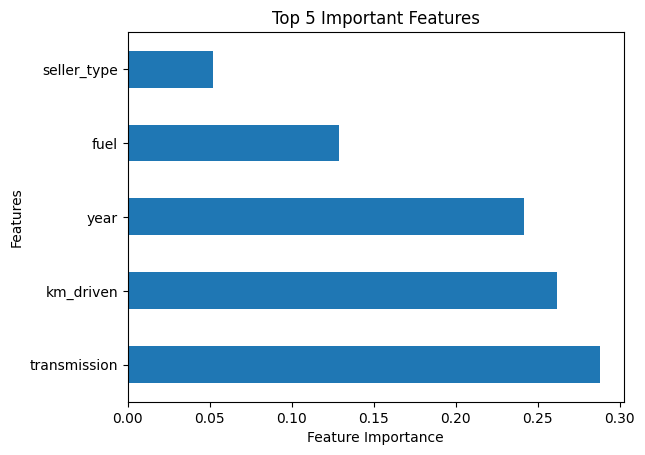

In [ ]:
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Important Features')
plt.show()

# **Linear Regression Model**

In [ ]:
# Linear Regression model predictions
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
price_predictions = regression_model.predict(X_test)

# comparing the actual prices and the predicted prices and their metrices in the linear regression model.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, price_predictions)

# R-squared
r2 = r2_score(Y_test, price_predictions)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, price_predictions, squared=False)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, price_predictions)

# Print the evaluation metrics
print("Mean Squared Error :", mse)
print("R-squared :", r2)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)

Mean Squared Error : 140808057982.915
R-squared : 0.41454426149943446
Root Mean Squared Error : 375243.9979305665
Mean Absolute Error : 237828.78953927688


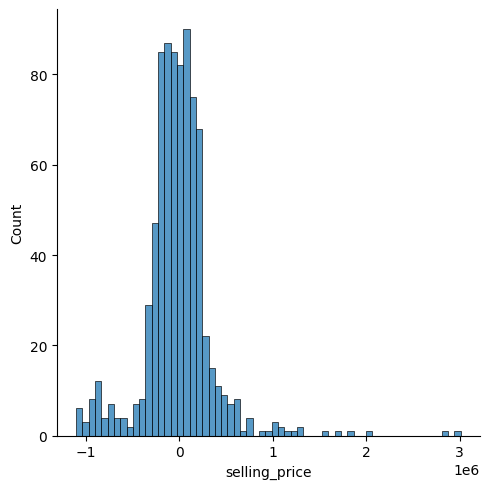

In [ ]:
sns.displot(Y_test-price_predictions)

Text(0.5, 1.0, 'Actual vs Predicted prices')

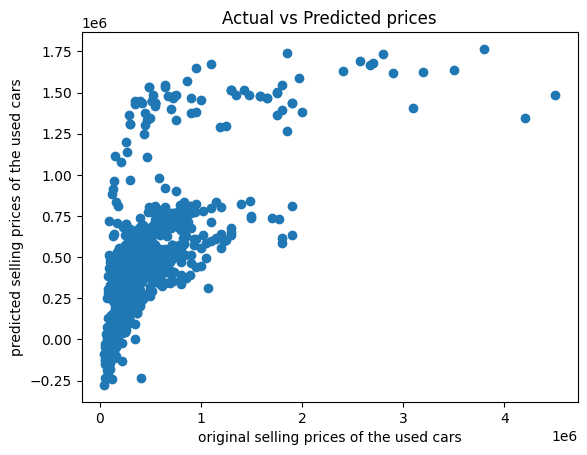

In [ ]:
plt.scatter(Y_test, price_predictions)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# **Lasso Regression Model**

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
Lasso_pred = lasso_model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Lasso_pred)
r2 = r2_score(Y_test, Lasso_pred)
mae = mean_absolute_error(Y_test, Lasso_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 140808003490.73047
R-Squared (R2): 0.41454448806858535
Mean Absolute Error (MAE): 237828.71376885386
Root Mean Squared Error (RMSE): 375243.92532155727


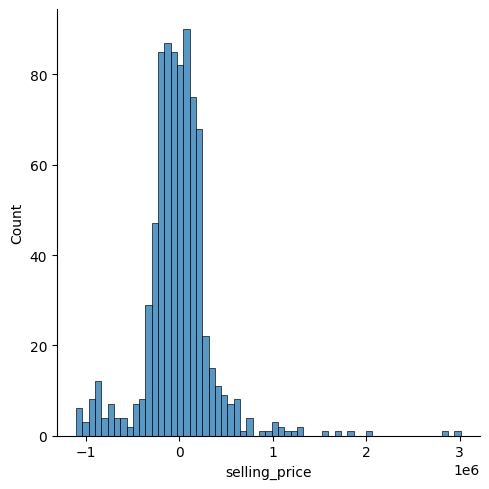

In [ ]:
sns.displot(Y_test-Lasso_pred)

Text(0.5, 1.0, 'Actual vs Predicted prices')

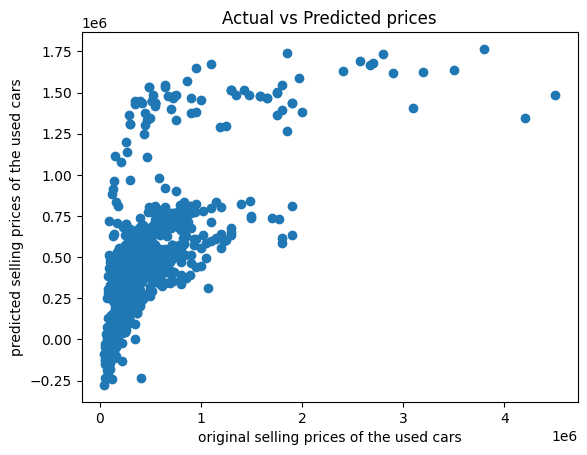

In [ ]:
plt.scatter(Y_test, Lasso_pred)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# **Neural Network Regression Model**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Train the neural network regression model
neural_network_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
neural_network_model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [ ]:
# Make predictions on the test set
Neural_Network_prediction = neural_network_model.predict(X_test)

# Compute the metrics
mse = mean_squared_error(Y_test, Neural_Network_prediction)
r2 = r2_score(Y_test, Neural_Network_prediction)
mae = mean_absolute_error(Y_test, Neural_Network_prediction)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 230742055006.37274
R-Squared (R2): 0.04061413705964778
Mean Absolute Error (MAE): 295178.7163174943
Root Mean Squared Error (RMSE): 480356.17515170213


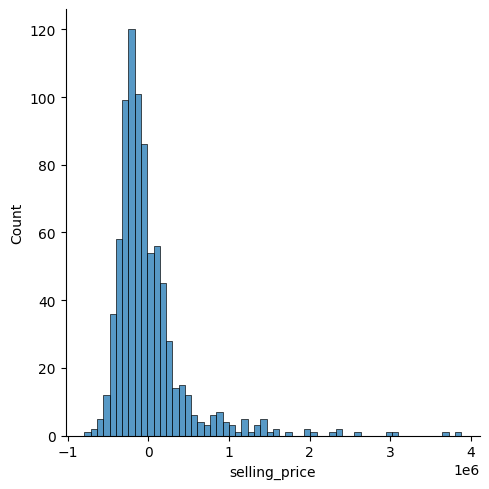

In [ ]:
sns.displot(Y_test-Neural_Network_prediction)

Text(0.5, 1.0, 'Actual vs Predicted prices')

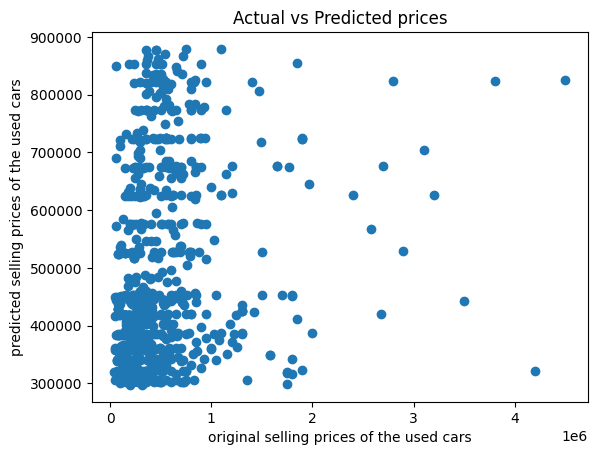

In [ ]:
plt.scatter(Y_test, Neural_Network_prediction)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# **XG boost regression model**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Train the XGBoost regression model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
Xg_Boost_prediction = xgb_model.predict(X_test)

# Compute the metrics
mse = mean_squared_error(Y_test, Xg_Boost_prediction)
r2 = r2_score(Y_test, Xg_Boost_prediction)
mae = mean_absolute_error(Y_test, Xg_Boost_prediction)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 104700367546.30898
R-Squared (R2): 0.5646738412474768
Mean Absolute Error (MAE): 172123.80192843865
Root Mean Squared Error (RMSE): 323574.3616949726


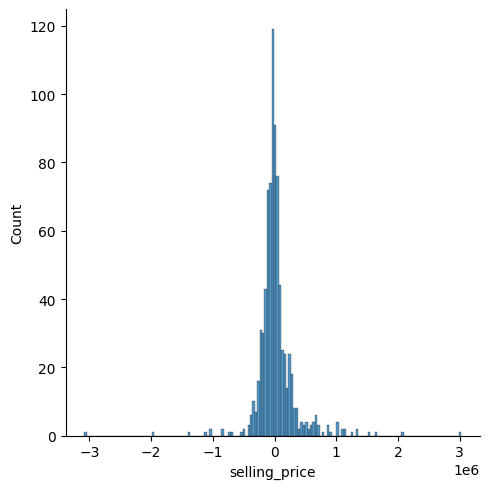

In [ ]:
sns.displot(Y_test-Xg_Boost_prediction)

Text(0.5, 1.0, 'Actual vs Predicted prices')

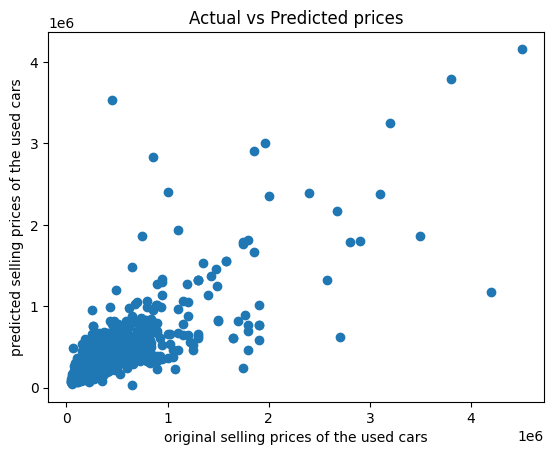

In [ ]:
# plotting the scatter plot
plt.scatter(Y_test, Xg_Boost_prediction)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# **LG boost regression model**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
# Create and train the LightGBM regression model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, Y_train)

LGBMRegressor()

In [ ]:
# Make predictions
lg_boost_prediction = lgb_model.predict(X_test)

# Compute the metrics
mse = mean_squared_error(Y_test, lg_boost_prediction)
r2 = r2_score(Y_test, lg_boost_prediction)
mae = mean_absolute_error(Y_test, lg_boost_prediction)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 110635294991.2816
R-Squared (R2): 0.539997431530461
Mean Absolute Error (MAE): 184679.25311579843
Root Mean Squared Error (RMSE): 332618.84340981283


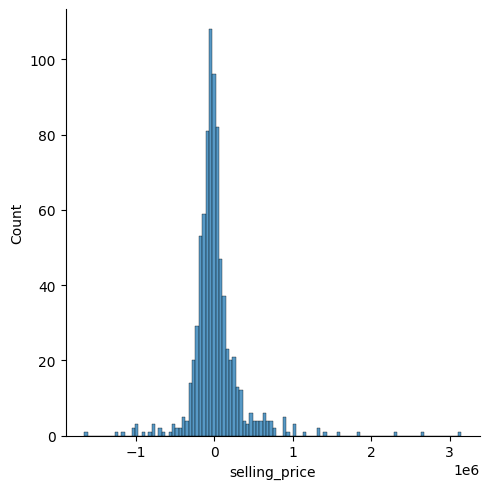

In [ ]:
sns.displot(Y_test-lg_boost_prediction)

Text(0.5, 1.0, 'Actual vs Predicted prices')

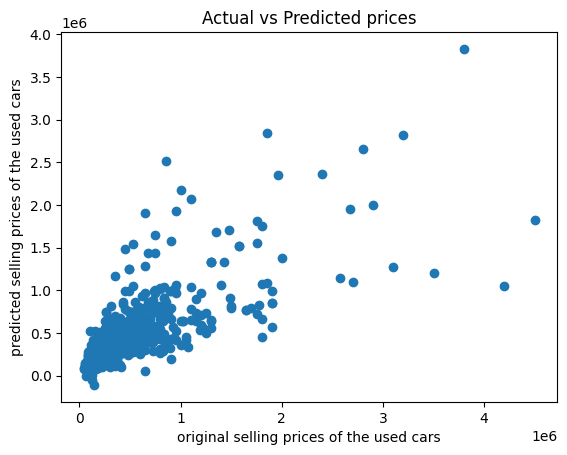

In [ ]:
plt.scatter(Y_test, lg_boost_prediction)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# **Random Forest regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regression model
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the test set
random_forest_prediction = random_forest_model.predict(X_test)

# Compute the metrics
mse = mean_squared_error(Y_test, random_forest_prediction)
r2 = r2_score(Y_test, random_forest_prediction)
mae = mean_absolute_error(Y_test, random_forest_prediction)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 117747104242.54755
R-Squared (R2): 0.5104277492486398
Mean Absolute Error (MAE): 178078.62361185154
Root Mean Squared Error (RMSE): 343142.97929951525


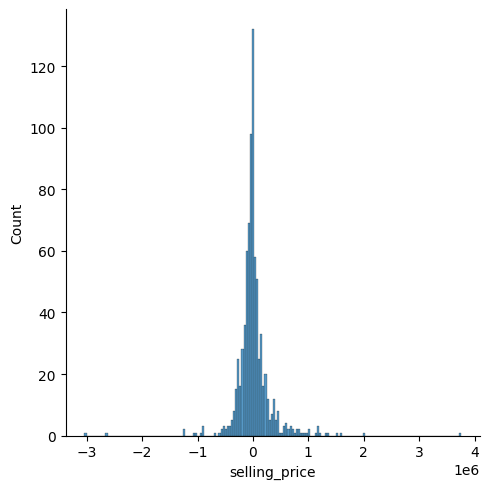

In [ ]:
sns.displot(Y_test-random_forest_prediction)

Text(0.5, 1.0, 'Actual vs Predicted prices')

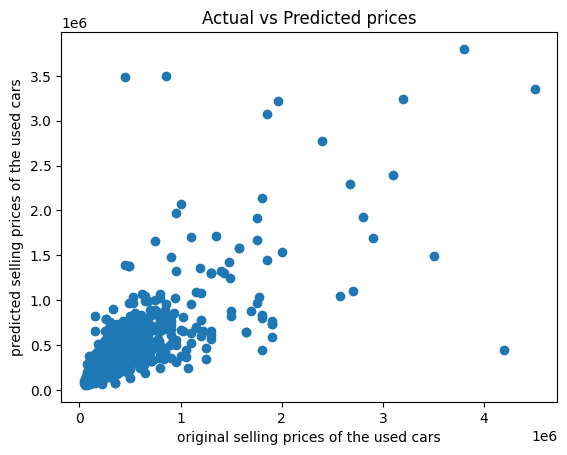

In [ ]:
plt.scatter(Y_test, random_forest_prediction)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# **Cat boost regression model**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.5 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Train the CatBoost regression model
cat_boost_model = cb.CatBoostRegressor(random_seed=42)
cat_boost_model.fit(X_train, Y_train)

Learning rate set to 0.049266
0:	learn: 585654.4060873	total: 47.1ms	remaining: 47s
1:	learn: 569448.8950377	total: 48.2ms	remaining: 24.1s
2:	learn: 554307.6194585	total: 49.3ms	remaining: 16.4s
3:	learn: 541162.4070673	total: 50.5ms	remaining: 12.6s
4:	learn: 528174.3142557	total: 51.6ms	remaining: 10.3s
5:	learn: 516931.6060092	total: 52.5ms	remaining: 8.7s
6:	learn: 505175.0751319	total: 53.7ms	remaining: 7.61s
7:	learn: 493935.3751107	total: 54.8ms	remaining: 6.8s
8:	learn: 483743.1123537	total: 55.9ms	remaining: 6.16s
9:	learn: 474507.3128413	total: 57.6ms	remaining: 5.7s
10:	learn: 465259.2033815	total: 59.2ms	remaining: 5.32s
11:	learn: 456902.1783453	total: 60.4ms	remaining: 4.97s
12:	learn: 448530.4457243	total: 61.2ms	remaining: 4.64s
13:	learn: 441184.1560765	total: 62.2ms	remaining: 4.38s
14:	learn: 433959.6717364	total: 64.1ms	remaining: 4.21s
15:	learn: 427953.5833529	total: 65.3ms	remaining: 4.01s
16:	learn: 422436.4565658	total: 66.3ms	remaining: 3.83s
17:	learn: 41650

In [ ]:
# Make predictions on the test set
catboost_predictions = cat_boost_model.predict(X_test)

# Compute the metrics
mse = mean_squared_error(Y_test, catboost_predictions)
r2 = r2_score(Y_test, catboost_predictions)
mae = mean_absolute_error(Y_test, catboost_predictions)
rmse = np.sqrt(mse)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 96898855859.70512
R-Squared (R2): 0.5971111878832469
Mean Absolute Error (MAE): 178223.05729409613
Root Mean Squared Error (RMSE): 311285.8105659574


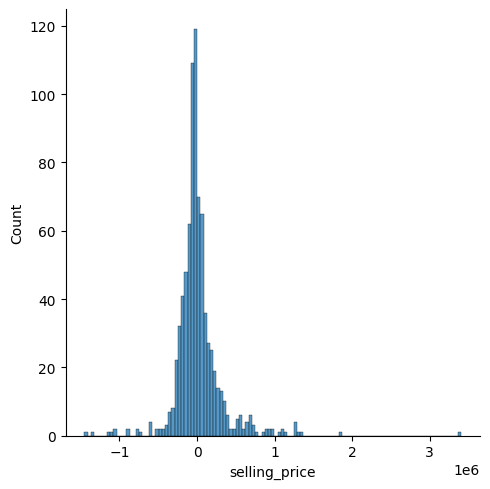

In [ ]:
sns.displot(Y_test-catboost_predictions)

Text(0.5, 1.0, 'Actual vs Predicted prices')

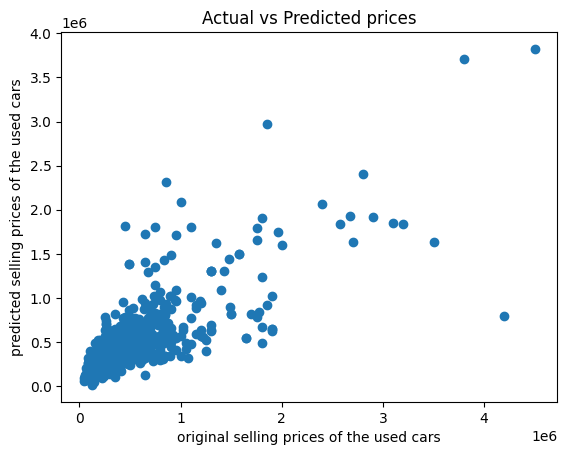

In [ ]:
plt.scatter(Y_test, catboost_predictions)
plt.xlabel('original selling prices of the used cars')
plt.ylabel('predicted selling prices of the used cars')
plt.title('Actual vs Predicted prices')

# Predicting the prices of the new dataset by using these models

In [ ]:
# loading the new dataset into the dataframe for predictions
New_df = pd.read_csv('/content/New_dataset.csv')

In [ ]:
New_df.head()

,Unnamed: 0,Name,Location,year,km_driven,fuel,transmission,owner,Mileage,Engine,Power,seller_type,New_Price,selling_price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
New_df.shape

(6019, 14)

In [ ]:
# summing all the null vlaues in the dataframe
New_df.isnull().sum()

Unnamed: 0          0
Name                0
Location            0
year                0
km_driven           0
fuel                0
transmission        0
owner               0
Mileage             2
Engine             36
Power              36
seller_type        42
New_Price        5195
selling_price       0
dtype: int64

In [ ]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6019 non-null   int64  
 1   Name           6019 non-null   object 
 2   Location       6019 non-null   object 
 3   year           6019 non-null   int64  
 4   km_driven      6019 non-null   int64  
 5   fuel           6019 non-null   object 
 6   transmission   6019 non-null   object 
 7   owner          6019 non-null   object 
 8   Mileage        6017 non-null   object 
 9   Engine         5983 non-null   object 
 10  Power          5983 non-null   object 
 11  seller_type    5977 non-null   float64
 12  New_Price      824 non-null    object 
 13  selling_price  6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# model prediction


In [ ]:
# droping all the specified features in the dataframe which will contain less weights for predictions
drop_columns = ['Unnamed: 0', 'Name', 'Location', 'Mileage','Engine', 'Power','New_Price', 'selling_price']
New_df = New_df.drop(columns=drop_columns , axis=1)

In [ ]:
New_df

,year,km_driven,fuel,transmission,owner,seller_type
0,2010,72000,CNG,Manual,First,5.0
1,2015,41000,Diesel,Manual,First,5.0
2,2011,46000,Petrol,Manual,First,5.0
3,2012,87000,Diesel,Manual,First,7.0
4,2013,40670,Diesel,Automatic,Second,5.0
...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,5.0
6015,2015,100000,Diesel,Manual,First,5.0
6016,2012,55000,Diesel,Manual,Second,8.0
6017,2013,46000,Petrol,Manual,First,5.0


In [ ]:
# Adding the current year to the dataframe
New_df['Current_Year'] = 2023

In [ ]:
# giving the ordering to the features in the new dataframe
column_order = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner','Current_Year']
New_df = New_df[column_order]

## Converting all the categorical features into the numerical features in the new dataset by using the label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in New_df.columns:
    # Check if the column contains categorical data (object or string type)
    if New_df[column].dtype == 'object':
        # Fit the LabelEncoder on the column and transform the data
        New_df[column] = label_encoder.fit_transform(New_df[column])

## Predicting the car prices of the new dataset by XGboost model

In [ ]:
X_new = New_df
# Make predictions on the new data
XG_Boost_predictions = xgb_model.predict(X_new)
# Print the predicted prices
print("Predicted prices:", XG_Boost_predictions)

Predicted prices: [ 365982.3 1003126.2 1251388.8 ...  711653.8 1272971.  1766743.8]


## Predicting the car prices of the new dataset by LG_boost regression model

In [ ]:
# Make predictions on the new data
lg_boost_prediction = lgb_model.predict(X_new)
# Print the predicted prices
print("Predicted prices:", lg_boost_prediction)

Predicted prices: [ 364909.60200942 1128149.38221025  993893.67276372 ...  975819.14700871
 1454259.10908358 1100220.75034896]


## Predicting the car prices of the new dataset by catboost regression model

In [ ]:
# Make predictions on the new data
catboost_predictions = cat_boost_model.predict(X_new)
# Print the predicted prices
print("Predicted prices:", catboost_predictions)

Predicted prices: [ 288227.15596014 1393482.22435529  933512.15363411 ...  978452.97906495
 1327219.02407831 1238435.4379717 ]
